# Reasons of employee resigning in DETE and TAFE
## Possible factors of dissatisfaction

In the following project we try to gain an understanding, why do certain employees of Department of Education, Training and Employement (DETE) and Technical and Further Education (TAFE) resign. Most importantly, we analyse the resignation reasons of employees based on their employment duration to see if it has an affect on the dissatisfaction.
We base our analysis on exit surveys that were filled by the leavers of the two institutes mentioned above.
The columns that we are interested in from the two surveys:

dete_survey.csv:
* `ID`: An id used to identify the participant of the survey
* `SeparationType`: The reason why the person's employment ended
* `Cease Date`: The year or month the person's employment ended
* `DETE Start Date`: The year the person began employment with the DETE

tafe_survey.csv:
* `Record ID`: An id used to identify the participant of the survey
* `Reason for ceasing employment`: The reason why the person's employment ended
* `LengthofServiceOverall. Overall Length of Service at Institute (in years)`: The length of the person's employment (in years)

## Data import

In [310]:
import pandas as pd
import numpy as np

dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')

pd.options.display.max_columns = 150

In [311]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

In [312]:
dete_survey.head()

ID                    SeparationType Cease Date DETE Start Date  \
0   1             Ill Health Retirement    08/2012            1984   
1   2  Voluntary Early Retirement (VER)    08/2012      Not Stated   
2   3  Voluntary Early Retirement (VER)    05/2012            2011   
3   4         Resignation-Other reasons    05/2012            2005   
4   5                    Age Retirement    05/2012            1970   

  Role Start Date                                      Position  \
0            2004                                Public Servant   
1      Not Stated                                Public Servant   
2            2011                               Schools Officer   
3            2006                                       Teacher   
4            1989  Head of Curriculum/Head of Special Education   

  Classification              Region                      Business Unit  \
0        A01-A04      Central Office  Corporate Strategy and Peformance   
1        AO5-AO7      Central Office  Corporate Strategy and Peformance   
2            NaN      Central Office               Education Queensland   
3        Primary  Central Queensland                                NaN   
4            NaN          South East                                NaN   

     Employment Status  Career move to public sector  \
0  Permanent Full-time                          True   
1  Permanent Full-time                         False   
2  Permanent Full-time                         False   
3  Permanent Full-time                         False   
4  Permanent Full-time                         False   

   Career move to private sector  Interpersonal conflicts  \
0                          False                    False   
1                          False                    False   
2                          False                    False   
3                           True                    False   
4                          False                    False   

   Job dissatisfaction  Dissatisfaction with the department  \
0                 True                                False   
1                False                                False   
2                False                                False   
3                False                                False   
4                False                                False   

   Physical work environment  Lack of recognition  Lack of job security  \
0                      False                 True                 False   
1                      False                False                 False   
2                      False                False                 False   
3                      False                False                 False   
4                      False                False                 False   

   Work location  Employment conditions  Maternity/family  Relocation  \
0          False                  False             False       False   
1          False                  False             False       False   
2          False                  False             False       False   
3          False                  False             False       False   
4          False                  False             False       False   

   Study/Travel  Ill Health  Traumatic incident  Work life balance  Workload  \
0         False       False               False              False     False   
1         False       False               False              False     False   
2         False       False               False              False     False   
3         False       False               False              False     False   
4         False       False               False               True     False   

   None of the above Professional Development Opportunities for promotion  \
0               True                        A                           A   
1              False                        A                           A   
2               True                       

In [313]:
dete_survey['SeparationType'].value_counts(dropna=False)

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: SeparationType, dtype: int64

In [314]:
dete_survey['Position'].value_counts(dropna=False)

Teacher                                                    324
Teacher Aide                                               137
Public Servant                                             126
Cleaner                                                     97
Head of Curriculum/Head of Special Education                38
Schools Officer                                             24
School Administrative Staff                                 16
Guidance Officer                                            12
Technical Officer                                           11
Professional Officer                                         7
Other                                                        7
School Based Professional Staff (Therapist, nurse, etc)      5
School Principal                                             5
NaN                                                          5
Business Service Manager                                     4
Deputy Principal                                       

In [315]:
dete_survey['Gender'].value_counts(dropna=False)

Female    573
Male      225
NaN        24
Name: Gender, dtype: int64

In [316]:
dete_survey['Age'].value_counts(dropna=False)

61 or older      222
56-60            174
51-55            103
46-50             63
41-45             61
26-30             57
36-40             51
21-25             40
31-35             39
NaN               11
20 or younger      1
Name: Age, dtype: int64

In [317]:
dete_survey['Employment Status'].value_counts(dropna=False)

Permanent Full-time    434
Permanent Part-time    308
Temporary Full-time     41
Temporary Part-time     24
Casual                  10
NaN                      5
Name: Employment Status, dtype: int64

In [318]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null float64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-

In [319]:
tafe_survey.head()

Record ID                              Institute  \
0  6.341330e+17  Southern Queensland Institute of TAFE   
1  6.341337e+17            Mount Isa Institute of TAFE   
2  6.341388e+17            Mount Isa Institute of TAFE   
3  6.341399e+17            Mount Isa Institute of TAFE   
4  6.341466e+17  Southern Queensland Institute of TAFE   

                   WorkArea  CESSATION YEAR Reason for ceasing employment  \
0  Non-Delivery (corporate)          2010.0              Contract Expired   
1  Non-Delivery (corporate)          2010.0                    Retirement   
2       Delivery (teaching)          2010.0                    Retirement   
3  Non-Delivery (corporate)          2010.0                   Resignation   
4       Delivery (teaching)          2010.0                   Resignation   

  Contributing Factors. Career Move - Public Sector   \
0                                                NaN   
1                                                  -   
2                                                  -   
3                                                  -   
4                                                  -   

  Contributing Factors. Career Move - Private Sector   \
0                                                NaN    
1                                                  -    
2                                                  -    
3                                                  -    
4                       Career Move - Private Sector    

  Contributing Factors. Career Move - Self-employment  \
0                                                NaN    
1                                                  -    
2                                                  -    
3                                                  -    
4                                                  -    

  Contributing Factors. Ill Health Contributing Factors. Maternity/Family  \
0                              NaN                                    NaN   
1                                -                                      -   
2                                -                                      -   
3                                -                                      -   
4                                -                                      -   

  Contributing Factors. Dissatisfaction  \
0                                   NaN   
1                                     -   
2                                     -   
3                                     -   
4                                     -   

  Contributing Factors. Job Dissatisfaction  \
0                                       NaN   
1                                         -   
2                                         -   
3                                         -   
4                                         -   

  Contributing Factors. Interpersonal Conflict Contributing Factors. Study  \
0                                          NaN                         NaN   
1                                            -                           -   
2                                            -                           -   
3                                            -                           -   
4                                            -                           -   

  Contributing Factors. Travel Contributing Factors. Other  \
0                          NaN                         NaN   
1                       Travel                           -   
2                            -                           -   
3                       Travel                           -   
4                            -                           -   

  Contributing Factors. NONE  \
0                        NaN   
1                          -   
2                       NONE   
3                          -   
4                          -   

  Main Factor. Which of these was the main factor for leaving?  \
0                                                NaN             

In [320]:
tafe_survey['Reason for ceasing employment'].value_counts(dropna=False)

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
NaN                           1
Name: Reason for ceasing employment, dtype: int64

In [321]:
tafe_survey['Gender. What is your Gender?'].value_counts(dropna=False)

Female    389
Male      207
NaN       106
Name: Gender. What is your Gender?, dtype: int64

In [322]:
tafe_survey['CurrentAge. Current Age'].value_counts(dropna=False)

56 or older      162
NaN              106
51-55             82
41  45            80
46  50            59
31  35            52
36  40            51
26  30            50
21  25            44
20 or younger     16
Name: CurrentAge. Current Age, dtype: int64

Based on the quick exploration of the two datasets, we can conflude the followings:
* Both datasets contains columns with the same information, just called differently
* Both datasets have columns that are not needed for the analysis and containing NA (missing) values
* The dete_survey dataframe has missing values labeled as 'Not Stated'

 ## Identifying missing values and dropping unnecessary columns

In [323]:
dete_survey_updated = pd.read_csv('dete_survey.csv', na_values='Not Stated')

In [324]:
dete_survey_updated = dete_survey_updated.drop(dete_survey_updated.columns[28:49], axis=1)

In [325]:
dete_survey_updated.head()

ID                    SeparationType Cease Date  DETE Start Date  \
0   1             Ill Health Retirement    08/2012           1984.0   
1   2  Voluntary Early Retirement (VER)    08/2012              NaN   
2   3  Voluntary Early Retirement (VER)    05/2012           2011.0   
3   4         Resignation-Other reasons    05/2012           2005.0   
4   5                    Age Retirement    05/2012           1970.0   

   Role Start Date                                      Position  \
0           2004.0                                Public Servant   
1              NaN                                Public Servant   
2           2011.0                               Schools Officer   
3           2006.0                                       Teacher   
4           1989.0  Head of Curriculum/Head of Special Education   

  Classification              Region                      Business Unit  \
0        A01-A04      Central Office  Corporate Strategy and Peformance   
1        AO5-AO7      Central Office  Corporate Strategy and Peformance   
2            NaN      Central Office               Education Queensland   
3        Primary  Central Queensland                                NaN   
4            NaN          South East                                NaN   

     Employment Status  Career move to public sector  \
0  Permanent Full-time                          True   
1  Permanent Full-time                         False   
2  Permanent Full-time                         False   
3  Permanent Full-time                         False   
4  Permanent Full-time                         False   

   Career move to private sector  Interpersonal conflicts  \
0                          False                    False   
1                          False                    False   
2                          False                    False   
3                           True                    False   
4                          False                    False   

   Job dissatisfaction  Dissatisfaction with the department  \
0                 True                                False   
1                False                                False   
2                False                                False   
3                False                                False   
4                False                                False   

   Physical work environment  Lack of recognition  Lack of job security  \
0                      False                 True                 False   
1                      False                False                 False   
2                      False                False                 False   
3                      False                False                 False   
4                      False                False                 False   

   Work location  Employment conditions  Maternity/family  Relocation  \
0          False                  False             False       False   
1          False                  False             False       False   
2          False                  False             False       False   
3          False                  False             False       False   
4          False                  False             False       False   

   Study/Travel  Ill Health  Traumatic incident  Work life balance  Workload  \
0         False       False               False              False     False   
1         False       False               False              False     False   
2         False       False               False              False     False   
3         False       False               False              False     False   
4         False       False               False               True     False   

   None of the above  Gender          Age Aboriginal Torres Strait South Sea  \
0               True    Male        56-60        NaN           NaN       NaN   
1              False    Male        56-60        NaN           NaN       NaN   
2               True  

In [326]:
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

In [327]:
tafe_survey_updated.head()

Record ID                              Institute  \
0  6.341330e+17  Southern Queensland Institute of TAFE   
1  6.341337e+17            Mount Isa Institute of TAFE   
2  6.341388e+17            Mount Isa Institute of TAFE   
3  6.341399e+17            Mount Isa Institute of TAFE   
4  6.341466e+17  Southern Queensland Institute of TAFE   

                   WorkArea  CESSATION YEAR Reason for ceasing employment  \
0  Non-Delivery (corporate)          2010.0              Contract Expired   
1  Non-Delivery (corporate)          2010.0                    Retirement   
2       Delivery (teaching)          2010.0                    Retirement   
3  Non-Delivery (corporate)          2010.0                   Resignation   
4       Delivery (teaching)          2010.0                   Resignation   

  Contributing Factors. Career Move - Public Sector   \
0                                                NaN   
1                                                  -   
2                                                  -   
3                                                  -   
4                                                  -   

  Contributing Factors. Career Move - Private Sector   \
0                                                NaN    
1                                                  -    
2                                                  -    
3                                                  -    
4                       Career Move - Private Sector    

  Contributing Factors. Career Move - Self-employment  \
0                                                NaN    
1                                                  -    
2                                                  -    
3                                                  -    
4                                                  -    

  Contributing Factors. Ill Health Contributing Factors. Maternity/Family  \
0                              NaN                                    NaN   
1                                -                                      -   
2                                -                                      -   
3                                -                                      -   
4                                -                                      -   

  Contributing Factors. Dissatisfaction  \
0                                   NaN   
1                                     -   
2                                     -   
3                                     -   
4                                     -   

  Contributing Factors. Job Dissatisfaction  \
0                                       NaN   
1                                         -   
2                                         -   
3                                         -   
4                                         -   

  Contributing Factors. Interpersonal Conflict Contributing Factors. Study  \
0                                          NaN                         NaN   
1                                            -                           -   
2                                            -                           -   
3                                            -                           -   
4                                            -                           -   

  Contributing Factors. Travel Contributing Factors. Other  \
0                          NaN                         NaN   
1                       Travel                           -   
2                            -                           -   
3                       Travel                           -   
4                            -                           -   

  Contributing Factors. NONE Gender. What is your Gender?  \
0                        NaN                       Female   
1                          -                          NaN   
2                       NONE                          NaN   
3                          -                          NaN   
4                  

In the previous steps, we:
* Corrected the 'Not Stated' values to NA
* Got rid of the columns that we will not use for our analysis

## Column name alignment
Previously we have noticed that some columns in the two dataframe contains the same information but with different header. In order to ensure the proper merger of dataframes, we rename some of the headers. 

In [328]:
dete_survey_updated.columns = (dete_survey_updated.columns
                               .str.strip()
                               .str.lower()
                               .str.replace(' ','_'))
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [329]:
dete_survey_updated.head()

id                    separationtype cease_date  dete_start_date  \
0   1             Ill Health Retirement    08/2012           1984.0   
1   2  Voluntary Early Retirement (VER)    08/2012              NaN   
2   3  Voluntary Early Retirement (VER)    05/2012           2011.0   
3   4         Resignation-Other reasons    05/2012           2005.0   
4   5                    Age Retirement    05/2012           1970.0   

   role_start_date                                      position  \
0           2004.0                                Public Servant   
1              NaN                                Public Servant   
2           2011.0                               Schools Officer   
3           2006.0                                       Teacher   
4           1989.0  Head of Curriculum/Head of Special Education   

  classification              region                      business_unit  \
0        A01-A04      Central Office  Corporate Strategy and Peformance   
1        AO5-AO7      Central Office  Corporate Strategy and Peformance   
2            NaN      Central Office               Education Queensland   
3        Primary  Central Queensland                                NaN   
4            NaN          South East                                NaN   

     employment_status  career_move_to_public_sector  \
0  Permanent Full-time                          True   
1  Permanent Full-time                         False   
2  Permanent Full-time                         False   
3  Permanent Full-time                         False   
4  Permanent Full-time                         False   

   career_move_to_private_sector  interpersonal_conflicts  \
0                          False                    False   
1                          False                    False   
2                          False                    False   
3                           True                    False   
4                          False                    False   

   job_dissatisfaction  dissatisfaction_with_the_department  \
0                 True                                False   
1                False                                False   
2                False                                False   
3                False                                False   
4                False                                False   

   physical_work_environment  lack_of_recognition  lack_of_job_security  \
0                      False                 True                 False   
1                      False                False                 False   
2                      False                False                 False   
3                      False                False                 False   
4                      False                False                 False   

   work_location  employment_conditions  maternity/family  relocation  \
0          False                  False             False       False   
1          False                  False             False       False   
2          False                  False             False       False   
3          False                  False             False       False   
4          False                  False             False       False   

   study/travel  ill_health  traumatic_incident  work_life_balance  workload  \
0         False       False               False              False     False   
1         False       False               False              False     False   
2         False       False               False              False     False   
3         False       False               False              False     False   
4         False       False               False               True     False   

   none_of_the_above  gender          age aboriginal torres_strait south_sea  \
0               True    Male        56-60        NaN           NaN       NaN   
1              False    Male        56-60        NaN           NaN       NaN   
2               True  

In [330]:
tafe_survey_updated.rename(columns={'Record ID': 'id',
                                   'CESSATION YEAR': 'cease_date',
                                   'Reason for ceasing employment': 'separationtype',
                                   'Gender. What is your Gender?':'gender',
                                   'CurrentAge. Current Age': 'age',
                                   'Employment Type. Employment Type': 'employment_status',
                                   'Classification. Classification': 'position',
                                   'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service'},
                           inplace=True)
tafe_survey_updated.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'LengthofServiceCurrent. Length of Service at current workplace (in years)'],
      dtype='object')

In [331]:
tafe_survey_updated.head()

id                              Institute  \
0  6.341330e+17  Southern Queensland Institute of TAFE   
1  6.341337e+17            Mount Isa Institute of TAFE   
2  6.341388e+17            Mount Isa Institute of TAFE   
3  6.341399e+17            Mount Isa Institute of TAFE   
4  6.341466e+17  Southern Queensland Institute of TAFE   

                   WorkArea  cease_date    separationtype  \
0  Non-Delivery (corporate)      2010.0  Contract Expired   
1  Non-Delivery (corporate)      2010.0        Retirement   
2       Delivery (teaching)      2010.0        Retirement   
3  Non-Delivery (corporate)      2010.0       Resignation   
4       Delivery (teaching)      2010.0       Resignation   

  Contributing Factors. Career Move - Public Sector   \
0                                                NaN   
1                                                  -   
2                                                  -   
3                                                  -   
4                                                  -   

  Contributing Factors. Career Move - Private Sector   \
0                                                NaN    
1                                                  -    
2                                                  -    
3                                                  -    
4                       Career Move - Private Sector    

  Contributing Factors. Career Move - Self-employment  \
0                                                NaN    
1                                                  -    
2                                                  -    
3                                                  -    
4                                                  -    

  Contributing Factors. Ill Health Contributing Factors. Maternity/Family  \
0                              NaN                                    NaN   
1                                -                                      -   
2                                -                                      -   
3                                -                                      -   
4                                -                                      -   

  Contributing Factors. Dissatisfaction  \
0                                   NaN   
1                                     -   
2                                     -   
3                                     -   
4                                     -   

  Contributing Factors. Job Dissatisfaction  \
0                                       NaN   
1                                         -   
2                                         -   
3                                         -   
4                                         -   

  Contributing Factors. Interpersonal Conflict Contributing Factors. Study  \
0                                          NaN                         NaN   
1                                            -                           -   
2                                            -                           -   
3                                            -                           -   
4                                            -                           -   

  Contributing Factors. Travel Contributing Factors. Other  \
0                          NaN                         NaN   
1                       Travel                           -   
2                            -                           -   
3                       Travel                           -   
4                            -                           -   

  Contributing Factors. NONE  gender     age    employment_status  \
0                        NaN  Female  26  30  Temporary Full-time   
1                          -     NaN     NaN                  NaN   
2                       NONE     NaN     NaN                  NaN   
3                          -     NaN     NaN                  NaN   
4                          -    Male  41  45  Permanent Full-time   

            

In our analysis we are focusing only on the responses of resigned employees, so we filter the `separationtype` column to values that contains `Resignation`. 

In [332]:
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [333]:
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [334]:
dete_resignations = dete_survey_updated[dete_survey_updated['separationtype'].str.contains('Resignation')].copy()

In [335]:
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype'] == 'Resignation']

## Verify the Data
Before continuing our data cleansing and manipulation to finish the data analysis perparation, it is always recommended to verify that the data doesn't contain any major inconsistencies.
We will check if:
* the years in `cease_date` are always after the years in the corresponding `dete_start_date`
* the years in both `cease_date` and `cease_date` are before the current date
* the years in `dete_start_date` are not before the year 1940, given that most people in this filed start working in their 20s

In [336]:
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
11/2013      9
07/2013      9
10/2013      6
08/2013      4
05/2013      2
05/2012      2
07/2006      1
2010         1
07/2012      1
09/2010      1
Name: cease_date, dtype: int64

In [337]:
dete_resignations['cease_date'] = (dete_resignations['cease_date']
                                   .str.split('/')
                                   .str[-1]
                                   .astype(float))

In [338]:
dete_resignations['cease_date'].value_counts(dropna=False)

 2013.0    146
 2012.0    129
 2014.0     22
NaN         11
 2010.0      2
 2006.0      1
Name: cease_date, dtype: int64

In [339]:
dete_resignations['emp_duration'] = dete_resignations['cease_date']-dete_resignations['dete_start_date']

In [340]:
dete_resignations[dete_resignations['emp_duration']<0].shape

(0, 36)

There are no rows where the start date of the employement is after the cease date.

In [341]:
dete_resignations['cease_date'].value_counts(dropna=False).sort_index()

 2006.0      1
 2010.0      2
 2012.0    129
 2013.0    146
 2014.0     22
NaN         11
Name: cease_date, dtype: int64

In [342]:
dete_resignations['dete_start_date'].value_counts(dropna=False).sort_index()

 1963.0     1
 1971.0     1
 1972.0     1
 1973.0     1
 1974.0     2
 1975.0     1
 1976.0     2
 1977.0     1
 1980.0     5
 1982.0     1
 1983.0     2
 1984.0     1
 1985.0     3
 1986.0     3
 1987.0     1
 1988.0     4
 1989.0     4
 1990.0     5
 1991.0     4
 1992.0     6
 1993.0     5
 1994.0     6
 1995.0     4
 1996.0     6
 1997.0     5
 1998.0     6
 1999.0     8
 2000.0     9
 2001.0     3
 2002.0     6
 2003.0     6
 2004.0    14
 2005.0    15
 2006.0    13
 2007.0    21
 2008.0    22
 2009.0    13
 2010.0    17
 2011.0    24
 2012.0    21
 2013.0    10
NaN        28
Name: dete_start_date, dtype: int64

In [343]:
tafe_resignations['cease_date'].value_counts(dropna=False).sort_index()

 2009.0      2
 2010.0     68
 2011.0    116
 2012.0     94
 2013.0     55
NaN          5
Name: cease_date, dtype: int64

The years in `cease_date` column of the two dataframes are not completely aligned. The most resignations happened in 2012 and 2013 in the dete dataframe while in the tafe dataframe between 2010 and 2012. Both dataframes have dates that are not in the other dataframe. Since we are not conducting analysis by year, this is not an issue for us. We can also conclude that the years are not after the current date, so the data can be used for our analysis.

## Calculating the Years of Service

In [344]:
dete_resignations['institute_service'] = dete_resignations['cease_date']-dete_resignations['dete_start_date'] 

The tafe dataframe already contains information about the length of the employment in the `institute_service` column. In the dete dataframe we had to calculate the duration by subtracking the `dete_start_date` from the `cease_date`.

## Categorize "Dissatisfied" Employees

Based on the following columns, we will categorize resigned employees as dissatisfied or not:

tafe_survey_updated:
* Contributing Factors. Dissatisfaction
* Contributing Factors. Job Dissatisfaction

dafe_survey_updated:
* job_dissatisfaction
* dissatisfaction_with_the_department
* physical_work_environment
* lack_of_recognition
* lack_of_job_security
* work_location
* employment_conditions
* work_life_balance
* workload

In [345]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [346]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts()

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [347]:
def update_vals(value):
    if pd.isnull(value):
        return np.nan
    elif value == '-':
        return False
    else:
        return True

tafe_resignations['dissatisfied'] = tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']].applymap(update_vals).any(1, skipna=False)
tafe_resignations_up = tafe_resignations.copy()

dete_resignations['dissatisfied'] = dete_resignations[['job_dissatisfaction',
       'dissatisfaction_with_the_department', 'physical_work_environment',
       'lack_of_recognition', 'lack_of_job_security', 'work_location',
       'employment_conditions', 'work_life_balance',
       'workload']].any(axis=1, skipna=False)
dete_resignations_up = dete_resignations.copy()

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [348]:
tafe_resignations_up['dissatisfied'].value_counts(dropna=False)

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

In [349]:
dete_resignations_up['dissatisfied'].value_counts(dropna=False)

False    162
True     149
Name: dissatisfied, dtype: int64

We identified the columns in each of the dataframes that can indicate job dissatisfaction. We converted the values in the tafe dataframe to True, False, N/A and finally filled a new `dissatisfied` column in both dataframes. We populated the `dissatisfied` column with True value if the values in any of the picked columns are True. Otherwise it was set to False (or N/A in case of missing values). 

## Combining the Two Dataframes

In [350]:
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'

combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index=True)

In [351]:
combined.notnull().sum().sort_values()

torres_strait                                                                  0
south_sea                                                                      3
aboriginal                                                                     7
disability                                                                     8
nesb                                                                           9
business_unit                                                                 32
classification                                                               161
region                                                                       265
role_start_date                                                              271
emp_duration                                                                 273
dete_start_date                                                              283
LengthofServiceCurrent. Length of Service at current workplace (in years)    290
ill_health                  

In [352]:
combined_updated = combined.dropna(axis=1, thresh=500)
combined_updated.shape

(651, 10)

Before we combined our dataframes, we added an `institute` column that helps to differentiate the data from each survey. Our combined dataframe still contained columns that we will not need for our analysis. We decided to drop those columns that have less than 500 non null values.

## Cleaning the Length of Employment Data
Next, we will clean the data in the `institute_service` column and categorize the employees using the following logic:
* New: Less than 3 years in the workplace
* Experienced: 3-6 years in the workplace
* Established: 7-10 years in the workplace
* Veteran: 11 or more years in the workplace

In [361]:
combined_updated['institute_service'].value_counts(dropna=False)

NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
0.0                   20
3.0                   20
6.0                   17
4.0                   16
2.0                   14
9.0                   14
7.0                   13
More than 20 years    10
13.0                   8
8.0                    8
15.0                   7
20.0                   7
10.0                   6
12.0                   6
14.0                   6
17.0                   6
22.0                   6
18.0                   5
16.0                   5
24.0                   4
11.0                   4
23.0                   4
21.0                   3
32.0                   3
19.0                   3
39.0                   3
26.0                   2
28.0                   2
30.0                   2
25.0                   2
36.0                   2


In [360]:
combined_updated['institute_service_up'] = (combined_updated['institute_service']
                                            .astype('str')
                                            .str.extract(r'(\d+)', expand=False)
                                            .astype('float'))

combined_updated['institute_service_up'].value_counts(dropna=False)

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



 1.0     159
NaN       88
 3.0      83
 5.0      56
 7.0      34
 11.0     30
 0.0      20
 20.0     17
 6.0      17
 4.0      16
 9.0      14
 2.0      14
 13.0      8
 8.0       8
 15.0      7
 22.0      6
 10.0      6
 17.0      6
 14.0      6
 12.0      6
 16.0      5
 18.0      5
 24.0      4
 23.0      4
 21.0      3
 39.0      3
 32.0      3
 19.0      3
 36.0      2
 30.0      2
 25.0      2
 26.0      2
 28.0      2
 42.0      1
 29.0      1
 35.0      1
 27.0      1
 41.0      1
 49.0      1
 38.0      1
 34.0      1
 33.0      1
 31.0      1
Name: institute_service_up, dtype: int64

In [366]:
def transform_service(value):
    if pd.isnull(value):
        return np.nan
    elif value < 3:
        return 'New'
    elif 3 <= value < 7:
        return 'Experienced'
    elif 7<= value < 11:
        return 'Established'
    else:
        return 'Veteran'
    
combined_updated['service_cat'] = combined_updated['institute_service_up'].apply(transform_service)
combined_updated['service_cat'].value_counts()

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



New            193
Experienced    172
Veteran        136
Established     62
Name: service_cat, dtype: int64

## Perform Some Initial Analysis


In [367]:
combined_updated['dissatisfied'].value_counts(dropna=False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

In [368]:
combined_updated['dissatisfied'] = combined_updated['dissatisfied'].fillna(False)

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



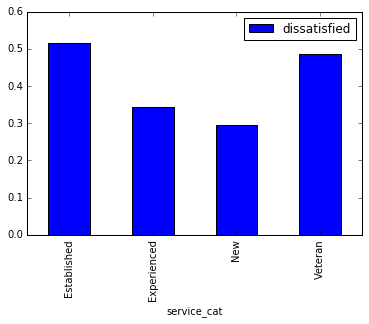

In [373]:
dis_pct = combined_updated.pivot_table(index='service_cat', values='dissatisfied', aggfunc=np.mean)

%matplotlib inline
dis_pct.plot(kind='bar')

We calculated the percentage of dissatisfied, resigned employees in each of the career stage categories. Approximately 50% of the `Established` and `Veteran` employees and 30-35% of `New` and `Experienced` employees left the institutes dissatisfied. Based on this initial analysis, we can conclude that employees of the two institutes with more than 7 years of experience are more likely to resign due to some dissatisfaction.